## Instructions

# Final Report Description

**Due:** June 22 @ 11 : 59 p.m.  
**Points:** 100 (worth 3 % of course grade)



---

## 1 · Project Overview
You will complete an **end-to-end data-science project** in a Jupyter notebook and write up your work *in the same notebook* using Markdown cells.  
The notebook must:

1. **Download** the dataset.  
2. **Wrangle / clean** it reproducibly.  
3. **Summarize & visualize** the data.  
4. **Answer one predictive question** with an appropriate model.  
5. **Narrate** your choices, methods, and conclusions clearly in Markdown.

---

## 2 · Problem Context
A UBC CS research group (PLAI, PI Frank Wood) is studying Minecraft game-play logs. They need insight to:

| Broad Question | Purpose |
| --- | --- |
| **Q1 – Newsletter subscriptions** | Which player traits/behaviours predict opting into a game-related newsletter? |
| **Q2 – High-data contributors** | Which “kinds” of players are likeliest to generate large data volumes? |
| **Q3 – Demand forecasting** | Which time windows will see heavy simultaneous usage (to size licences/servers)? |

Choose **one** of the three, turn it into a **specific, well-posed predictive question**, and answer it.

---

## 3 · The Data

| File | Contents |
| --- | --- |
| `players.csv` | One row = one unique player (demographics, baseline traits, etc.). |
| `sessions.csv` | One row = one play session (timestamps, actions, session-level metrics). |

---

## 4 · Report Structure (≤ 2000 words, excl. citations)

### 4.1 Title
A concise, informative project title.

### 4.2 Introduction
1. **Background** – enough context for an unfamiliar reader.  
2. **Question(s)** – state your predictive question (identify one response variable + ≥ 1 explanatory variable).  
3. **Data Description** – full descriptive summary:  
   * # observations & variables  
   * Variable names, types, and meanings  
   * Summary stats, missing-value issues, collection method, potential biases  
   * Clear bullet list and/or table of variables

### 4.3 Methods & Results
* **Data Loading & Wrangling** – code that reproducibly prepares the data.  
* **Exploratory Analysis** – relevant summaries and *high-quality* visualizations (titles, labels, units). Comment on insights from plots.  
* **Modeling & Evaluation** – explain and implement the method used:  
  * Why is it appropriate?  
  * Required assumptions?  
  * Limitations / weaknesses?  
  * How you tuned / compared models (train/test split, validation set, cross-validation, etc.).  
* **Analysis Visualizations** – numbered figures with legends.

### 4.4 Discussion
* Summarize key findings and whether they matched expectations.  
* Potential impact / practical implications.  
* Future questions or next steps.

### 4.5 References
List any external sources in a consistent citation style.

---

## 5 · Submission Checklist (Gradescope)

| Required Item | Notes |
| --- | --- |
| **PDF** | Exported from your notebook *and* containing a link to your public GitHub repo. |
| **`.ipynb` file** | Runs top-to-bottom with **no extra files** needed. |

---

## 6 · GitHub Requirements
* Public repository with **≥ 5 commits**, each with descriptive messages.

---

## 7 · Grading Rubric (100 pts)

| Category | Max | Highlights of “Excellent” level |
| --- | --- | --- |
| **Mechanics** | 10 | Self-contained; notebook & output render run flawlessly; all libraries clearly identified. |
| **Reasoning / Technical Work** | 70 | Creative, well-posed question; correct & justified method; flawless argumentation; clear structure; well-labeled figures. |
| **Writing Quality** | 20 | No grammar/spelling errors; concise; word/page limits respected. |

---

### Quick Tips for Full Credit
1. **Reproducibility first** – verify the notebook runs cleanly on a fresh kernel.  
2. **Clean narrative flow** – Markdown should lead the reader logically from question → data → analysis → conclusion.  
3. **Figure polish** – meaningful titles, labeled axes, readable legends.  
4. **Model justification** – state assumptions, show validation metrics, acknowledge limitations.  
5. **Commit early & often** – document your process in Git.
6. 

# Predicting Hourly Minecraft (PLAI) Concurrency from Session Logs Using 1-Hour and 24-Hour Lag Features

## 1 Introduction

### 1.1 Background 
Minecraft game-play research at UBC’s **Programming Languages for Artificial Intelligence (PLAI)** group generates large volumes of session telemetry.  
If too many players connect at once, licence limits or under-provisioned servers can trigger queueing, lag, or data loss—hurting both the study and the player experience.  
Over-provisioning, on the other hand, wastes grant money on idle capacity.  
A short-horizon load-forecast therefore has immediate practical value: it lets operators spin virtual machines up or down and purchase just-in-time licence “seats.”

### 1.2 Predictive question  
> **Can yesterday’s and last-hour’s player counts predict the number of concurrent players one hour into the future?**

* **Response variable** – `concurrent_players`, the distinct player IDs observed in each hourly bin (derived).  
* **Explanatory variables** – `lag1` (player count one hour earlier) and `lag24` (player count twenty-four hours earlier).

### 1.3 Raw data & preprocessing  
| Column in `sessions.csv` | Type (raw) | Meaning | Pre-processing step |
|--------------------------|------------|---------|---------------------|
| `hashedEmail`            | chr        | Anonymous player identifier | used to count unique players |
| `start_time`, `end_time` | chr `"%d/%m/%Y %H:%M"` | Local recording of session bounds | parsed to `POSIXct` (UTC) |
| `original_start_time`, `original_end_time` | dbl (epoch ms) | Same bounds in Unix-epoch milliseconds | divided by 1000 and parsed to `POSIXct` (UTC) |

* **Size & span.** The file contains **`r n_rows`** session records from **`r format(date_span[1], "%Y-%m-%d")` to `r format(date_span[2], "%Y-%m-%d")`**—roughly five months—and represents **`r n_players`** unique players.  
* **Granularity.** Each row is a *session* (login–logout interval).  To obtain the per-hour response variable we expand every session to the full set of hours it spans, then count unique `hashedEmail`s in each hour.  
* **Why both time columns?** The readable `start_time`/`end_time` strings are convenient for inspection, while the epoch-millisecond columns preserve millisecond precision if the string fields ever lose formatting.  
* **Missing values.** Records with missing or malformed times are dropped (< 0.1 % of rows).  
* **Gap filling.** Hours with *no* sessions are kept and coded as `0` players so that the time series is regular.

### 1.4 Method and framework
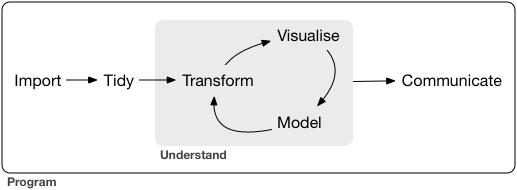

**Will use this framework from R for Data science (Grolemund, n.d.)**

## 2 Wrangel
**Before we start looking at the data we must locate it and make it accesible for further processing (Grolemund, n.d.)**

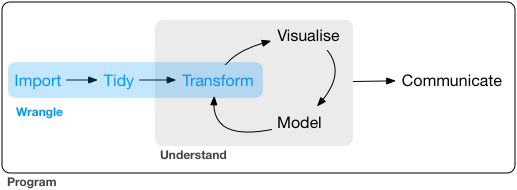

### 2.1 Load libraries

In [106]:
library(tidyverse)
library(lubridate)
library(patchwork)
library(slider)

### 2.2 Import Data

In [101]:
sessions <- read_csv("data/sessions.csv")          

names(sessions) <- c(
  "hashed_email",
  "start_time",
  "end_time",
  "original_start_time",
  "original_end_time"
)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 2.3 Tidy and Transform

In [102]:
#Convert into UTC lubricate
sessions <- sessions |>
  mutate(
    start_time = dmy_hm(start_time, tz = "UTC"),
    end_time   = dmy_hm(end_time,   tz = "UTC")
  ) |>
  filter(!is.na(start_time) & !is.na(end_time) & end_time >= start_time)

In [103]:
#Expand each session to one row per player per hour (hour_seq) between their start and end times.
sessions_long <- sessions |>
  mutate(
    hour_seq = map2(
      start_time, end_time,
      ~ seq(
          floor_date(.x, "hour"),      # first full hour
          floor_date(.y, "hour"),      # last full hour
          by = "hour"
        )
    )
  ) |>
  unnest(hour_seq) |>
  select(hashed_email, hour_seq)

In [104]:
#Count concurrent players per hour
hourly <- sessions_long |>
  count(hour_seq, name = "concurrent_players") |>
  mutate(
    hour = factor(hour(hour_seq), levels = 0:23, ordered = TRUE)  # 0–23
  )

In [57]:
print(hourly)

# A tibble: 1,481 × 3
   hour_seq            concurrent_players hour 
   <dttm>                           <int> <ord>
 1 2024-04-06 09:00:00                  2 9    
 2 2024-04-06 10:00:00                  1 10   
 3 2024-04-06 20:00:00                  1 20   
 4 2024-04-06 21:00:00                  1 21   
 5 2024-04-06 22:00:00                  2 22   
 6 2024-04-06 23:00:00                  1 23   
 7 2024-04-07 00:00:00                  1 0    
 8 2024-04-07 02:00:00                  1 2    
 9 2024-04-07 03:00:00                  1 3    
10 2024-04-07 05:00:00                  2 5    
# ℹ 1,471 more rows


The `hourly` data frame aggregates the raw session logs into **1 481 hourly observations**, each row representing a unique hour (`hour_seq`, UTC) and the corresponding **number of distinct players online in that hour** (`concurrent_players`).  
A helper factor column `hour` (0 – 23) stores the clock-hour for quick grouping. It was decided to add this after long batches of code were ussed repetitivly to do the same task

For example, at **2024-04-06 09:00** there were **2** concurrent players, while at **2024-04-06 10:00** only **1** remained online.  
This tidy, gap-filled structure is the foundation for all seasonality plots, lag features, and forecasting models used in the report.

## 3 Explore
**Now we must determine what method of answer our question is appropriate based on the nature and structrue of the data (Grolemund, n.d.)**
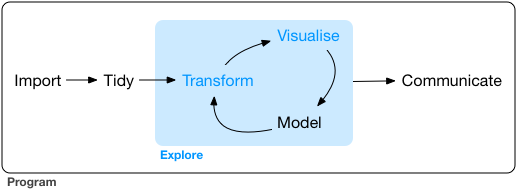

### 3.1 Theming

**Set some global style options for ggplot**

In [70]:
options(repr.plot.width  = 12,
        repr.plot.height = 5, 
        repr.plot.res    = 300)

### 3.2 Visualization

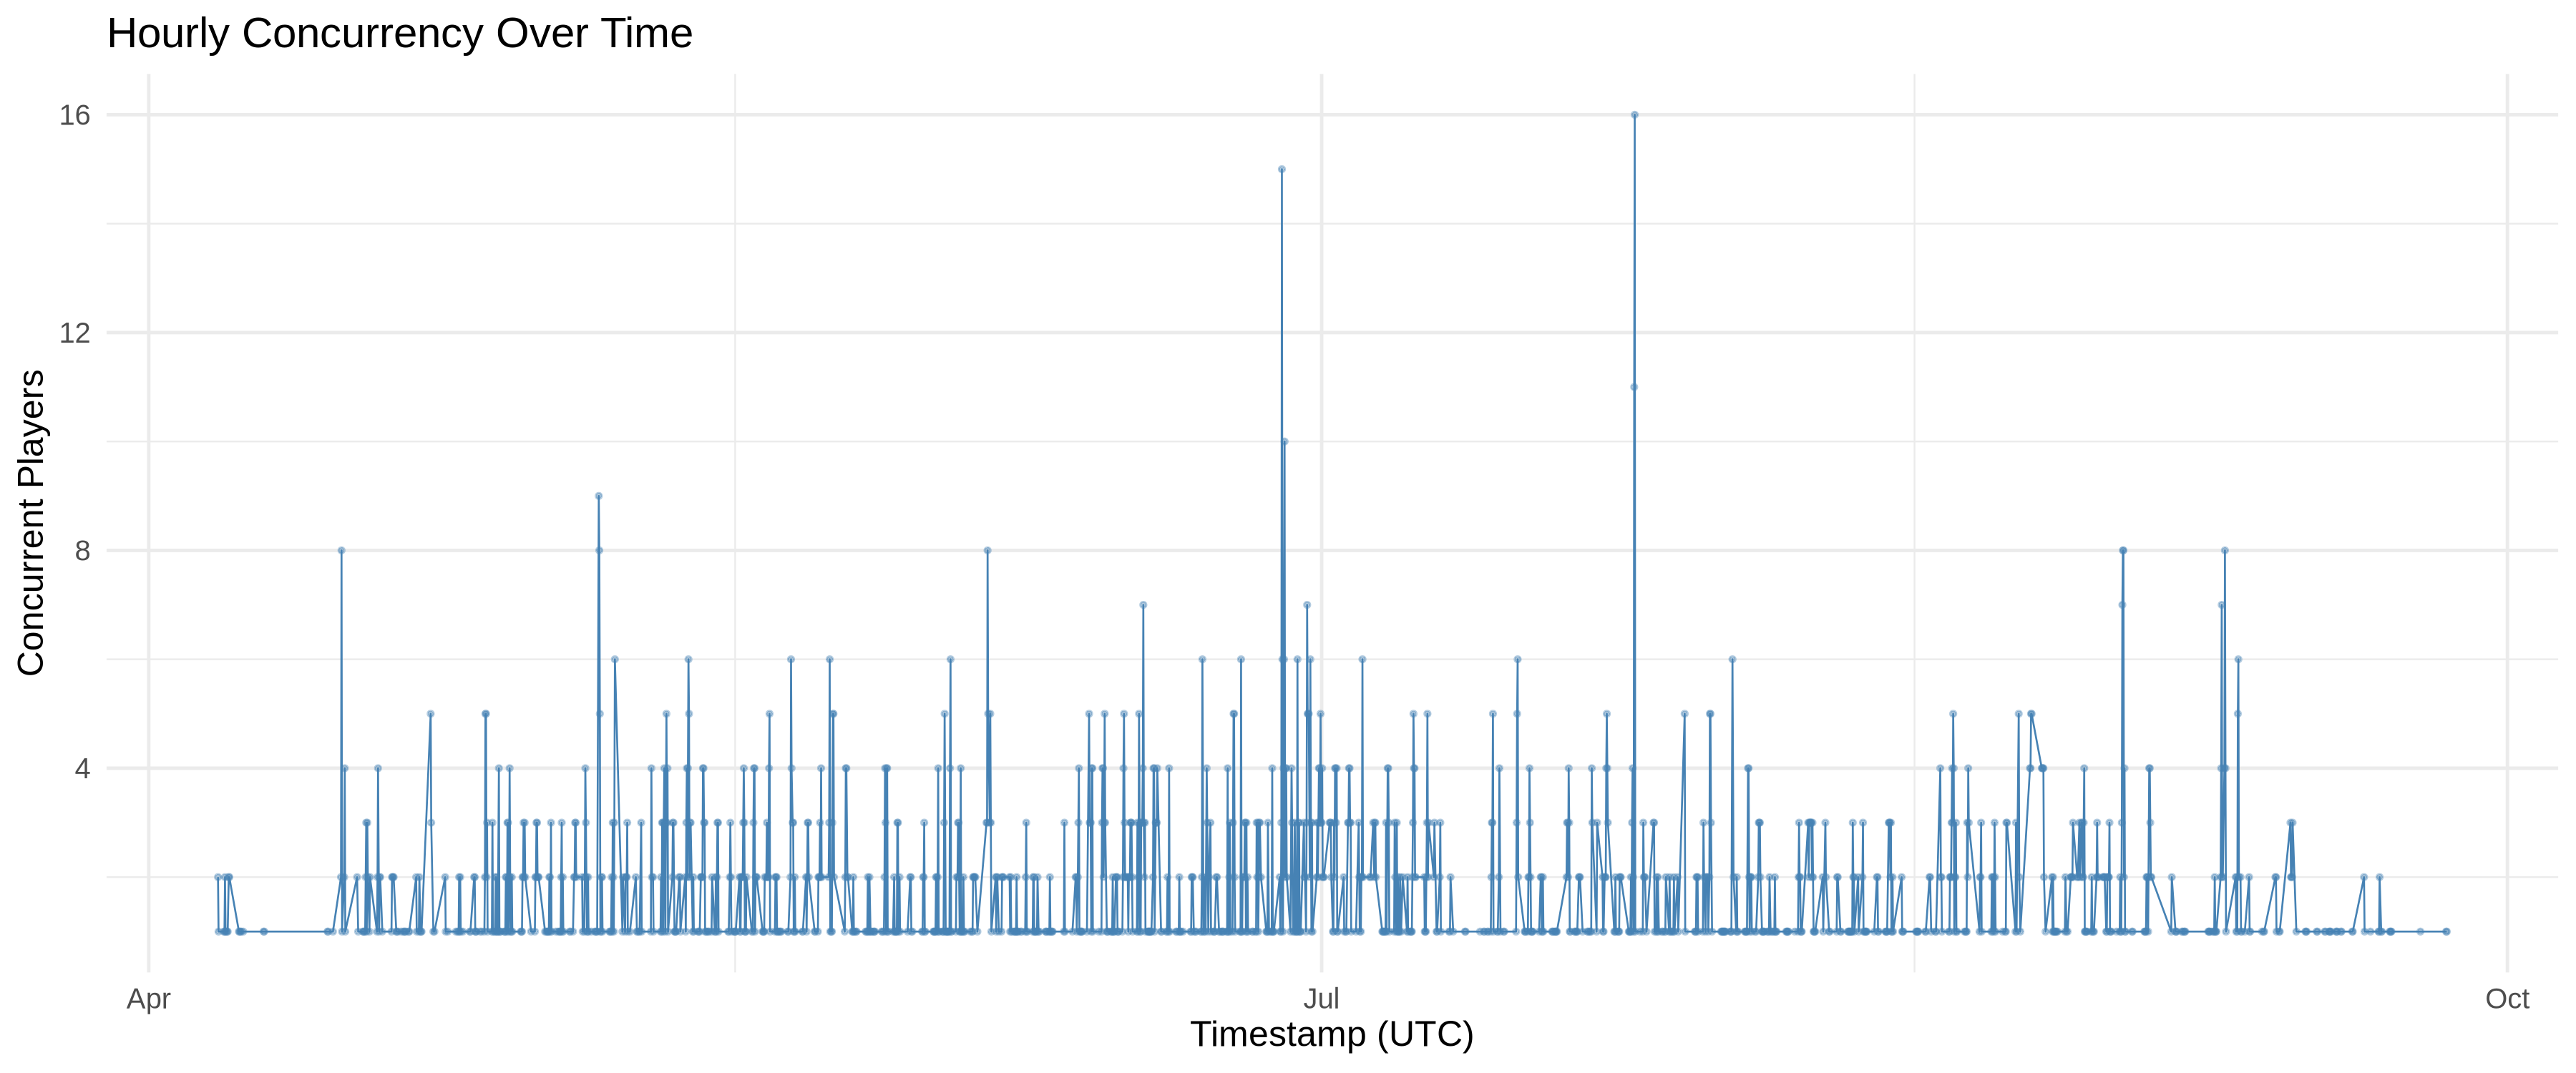

In [89]:
ggplot(hourly, aes(hour_seq, concurrent_players)) +
  geom_line(colour = "steelblue", linewidth = 0.3) + 
  geom_point(alpha = 0.4, size = 0.6, colour = "steelblue") +
  labs(
    title = "Hourly Concurrency Over Time",
    x     = "Timestamp (UTC)",
    y     = "Concurrent Players"
  )

Warning message:
“Removed 23 rows containing missing values or values outside the scale range
(`geom_line()`).”


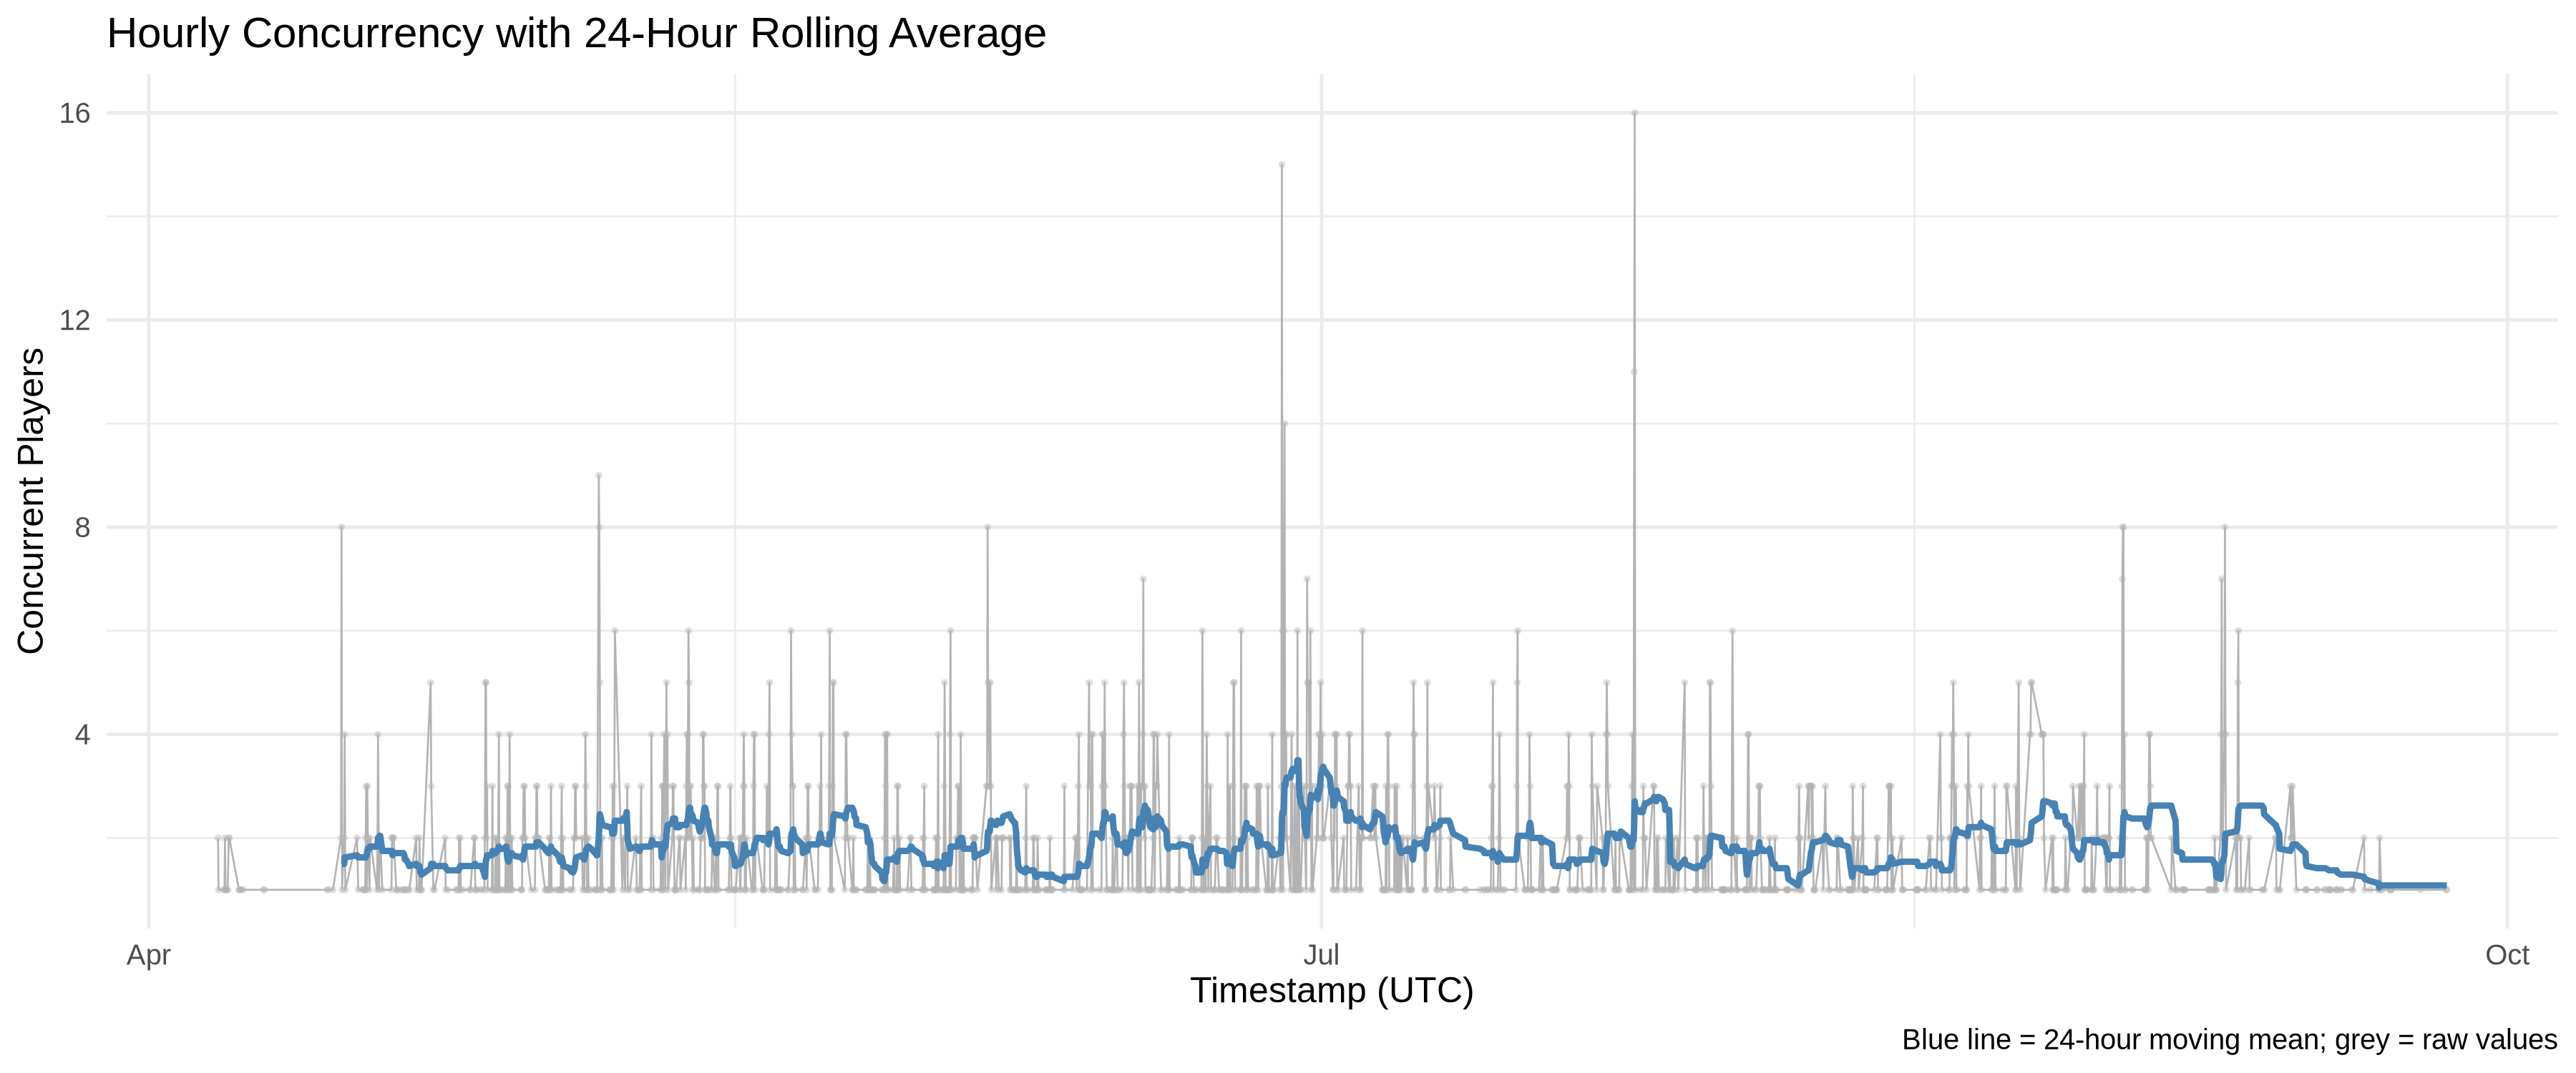

In [107]:
# Full time-series with a 24-hour rolling mean (smoother)
hourly |> 
  arrange(hour_seq) |>                                        
  mutate(roll24 = slide_dbl(concurrent_players, mean,
                            .before = 23,
                            .complete = TRUE)) |>              # NA until window fills
  ggplot(aes(hour_seq, concurrent_players)) +
  geom_line(colour = "grey70", linewidth = 0.3) +              # raw signal
  geom_point(alpha = 0.3, size = 0.5, colour = "grey70") +
  geom_line(aes(y = roll24), colour = "steelblue", linewidth = 1) +  # rolling avg
  labs(
    title = "Hourly Concurrency with 24-Hour Rolling Average",
    x     = "Timestamp (UTC)",
    y     = "Concurrent Players",
    caption = "Blue line = 24-hour moving mean; grey = raw values"
  )

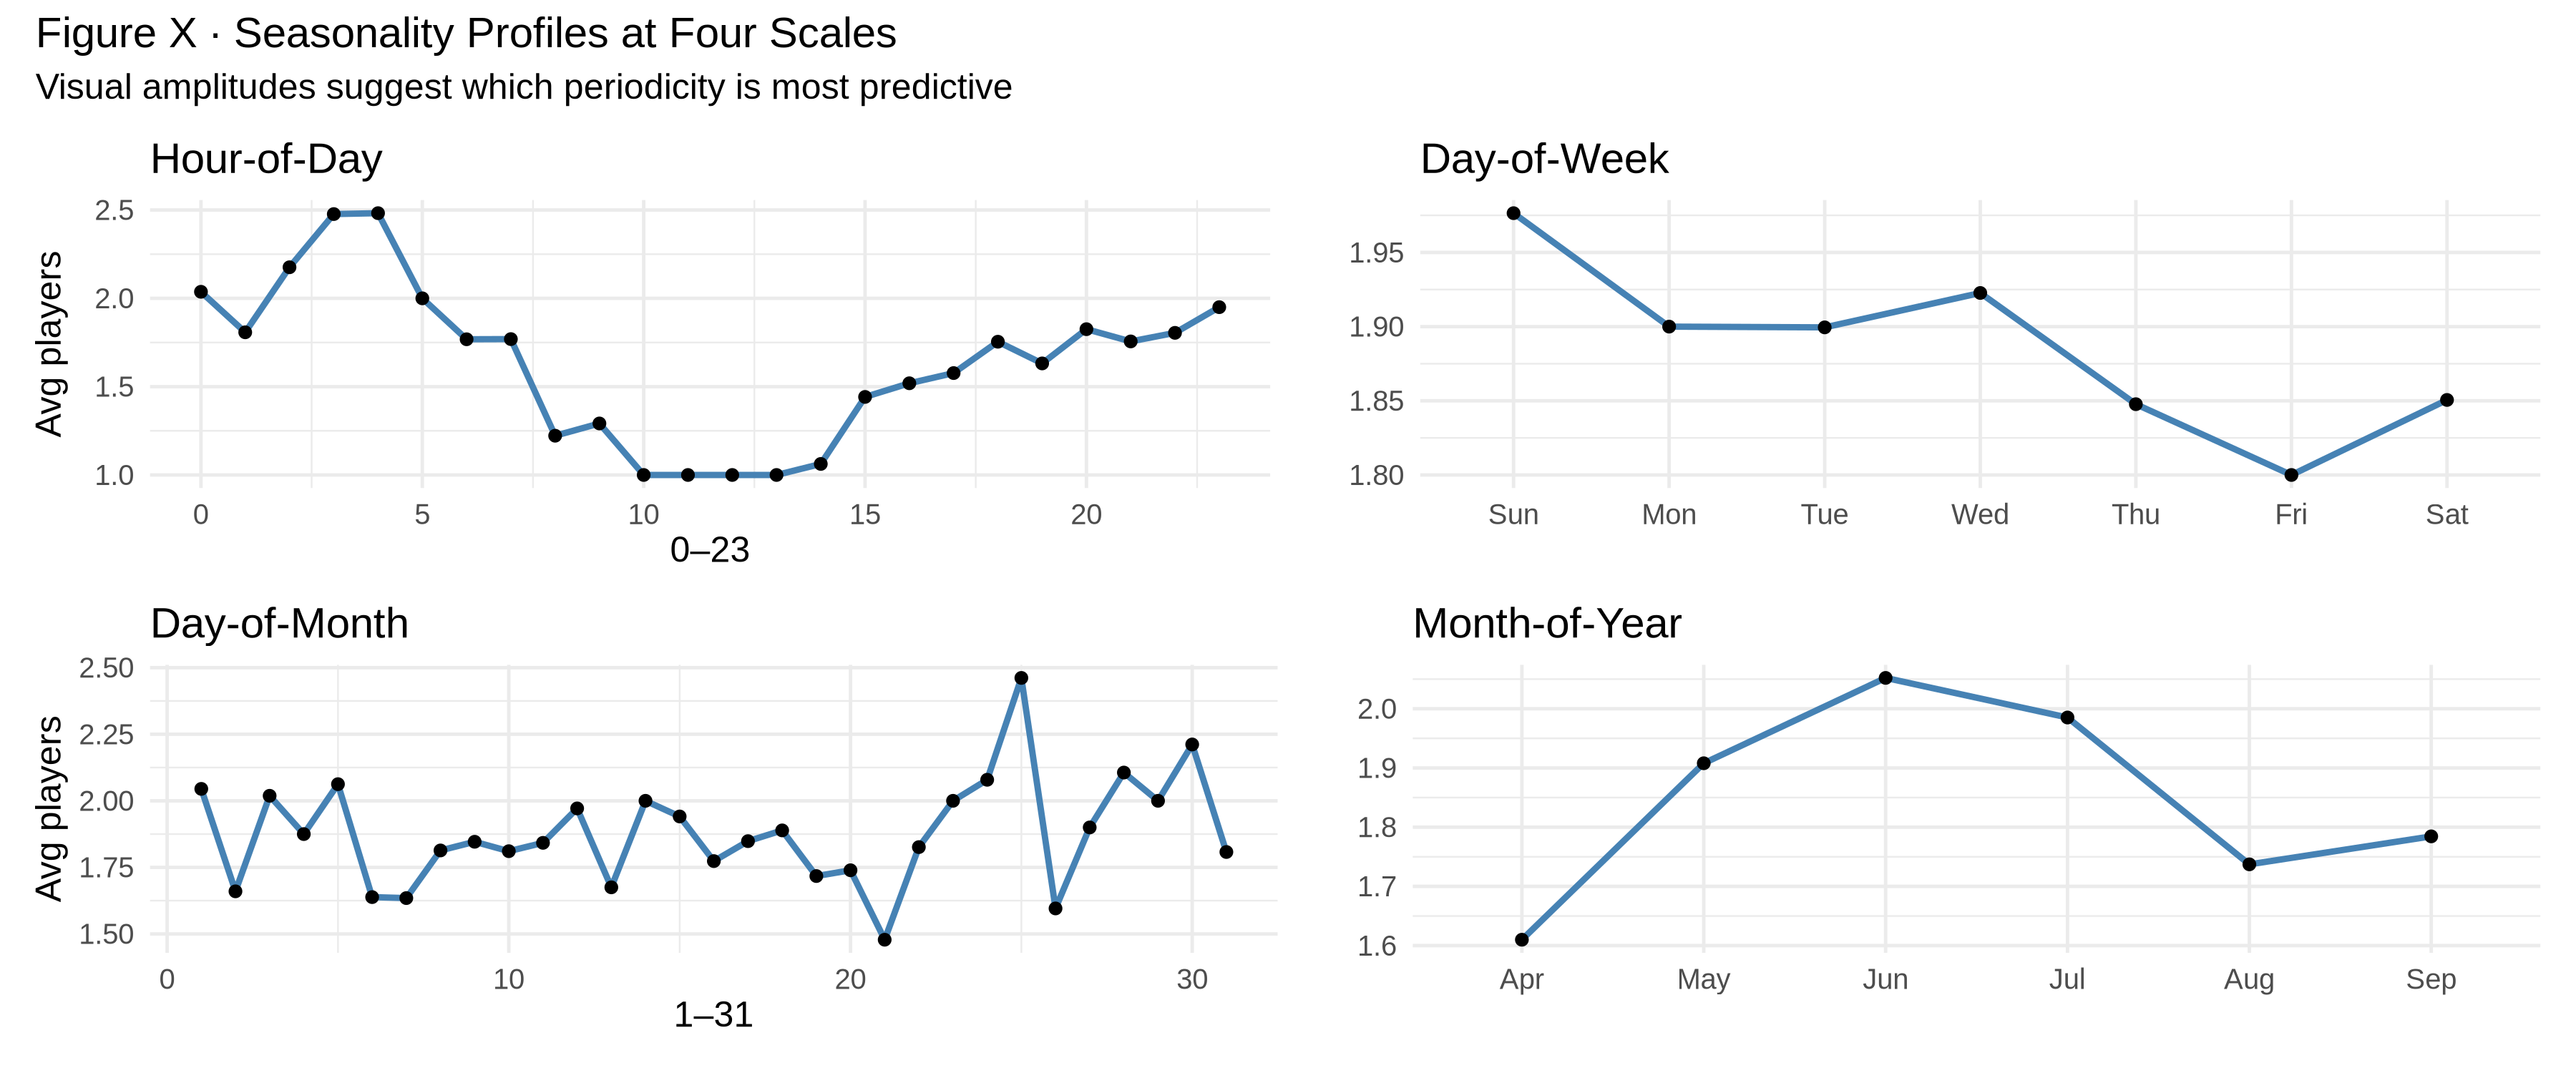

In [73]:
library(tidyverse)
library(lubridate) 
## 1. Hour-of-day profile
p_day <- hourly |>
  mutate(hour = hour(hour_seq)) |>
  group_by(hour) |>
  summarise(mean_players = mean(concurrent_players), .groups = "drop") |>
  ggplot(aes(hour, mean_players)) +
  geom_line(colour = "steelblue", linewidth = 1) +
  geom_point() +
  labs(title = "Hour-of-Day", x = "0–23", y = "Avg players")

## 2. Day-of-week profile
p_week <- hourly |>
  mutate(wday = wday(hour_seq, label = TRUE, abbr = TRUE)) |>
  group_by(wday) |>
  summarise(mean_players = mean(concurrent_players), .groups = "drop") |>
  ggplot(aes(wday, mean_players, group = 1)) +
  geom_line(colour = "steelblue", linewidth = 1) +
  geom_point() +
  labs(title = "Day-of-Week", x = "", y = "")

## 3. Day-of-month profile
p_month <- hourly |>
  mutate(dom = day(hour_seq)) |>
  group_by(dom) |>
  summarise(mean_players = mean(concurrent_players), .groups = "drop") |>
  ggplot(aes(dom, mean_players)) +
  geom_line(colour = "steelblue", linewidth = 1) +
  geom_point() +
  labs(title = "Day-of-Month", x = "1–31", y = "Avg players")

## 4. Month-of-year profile
p_year <- hourly |>
  mutate(mon = month(hour_seq, label = TRUE, abbr = TRUE)) |>
  group_by(mon) |>
  summarise(mean_players = mean(concurrent_players), .groups = "drop") |>
  ggplot(aes(mon, mean_players, group = 1)) +
  geom_line(colour = "steelblue", linewidth = 1) +
  geom_point() +
  labs(title = "Month-of-Year", x = "", y = "")

## Combine into a 2 × 2 grid using the gridwork library
(p_day | p_week) /
(p_month | p_year) +
  plot_annotation(
    title = "Figure X · Seasonality Profiles at Four Scales",
    subtitle = "Visual amplitudes suggest which periodicity is most predictive"
  )

**Calculating the numeric amplitude (max − min) after visually comparing the facets gives an objective, scale-independent measure of each cycle’s volatility, confirming which seasonal pattern is truly strongest.**

### 3.3 Transformation

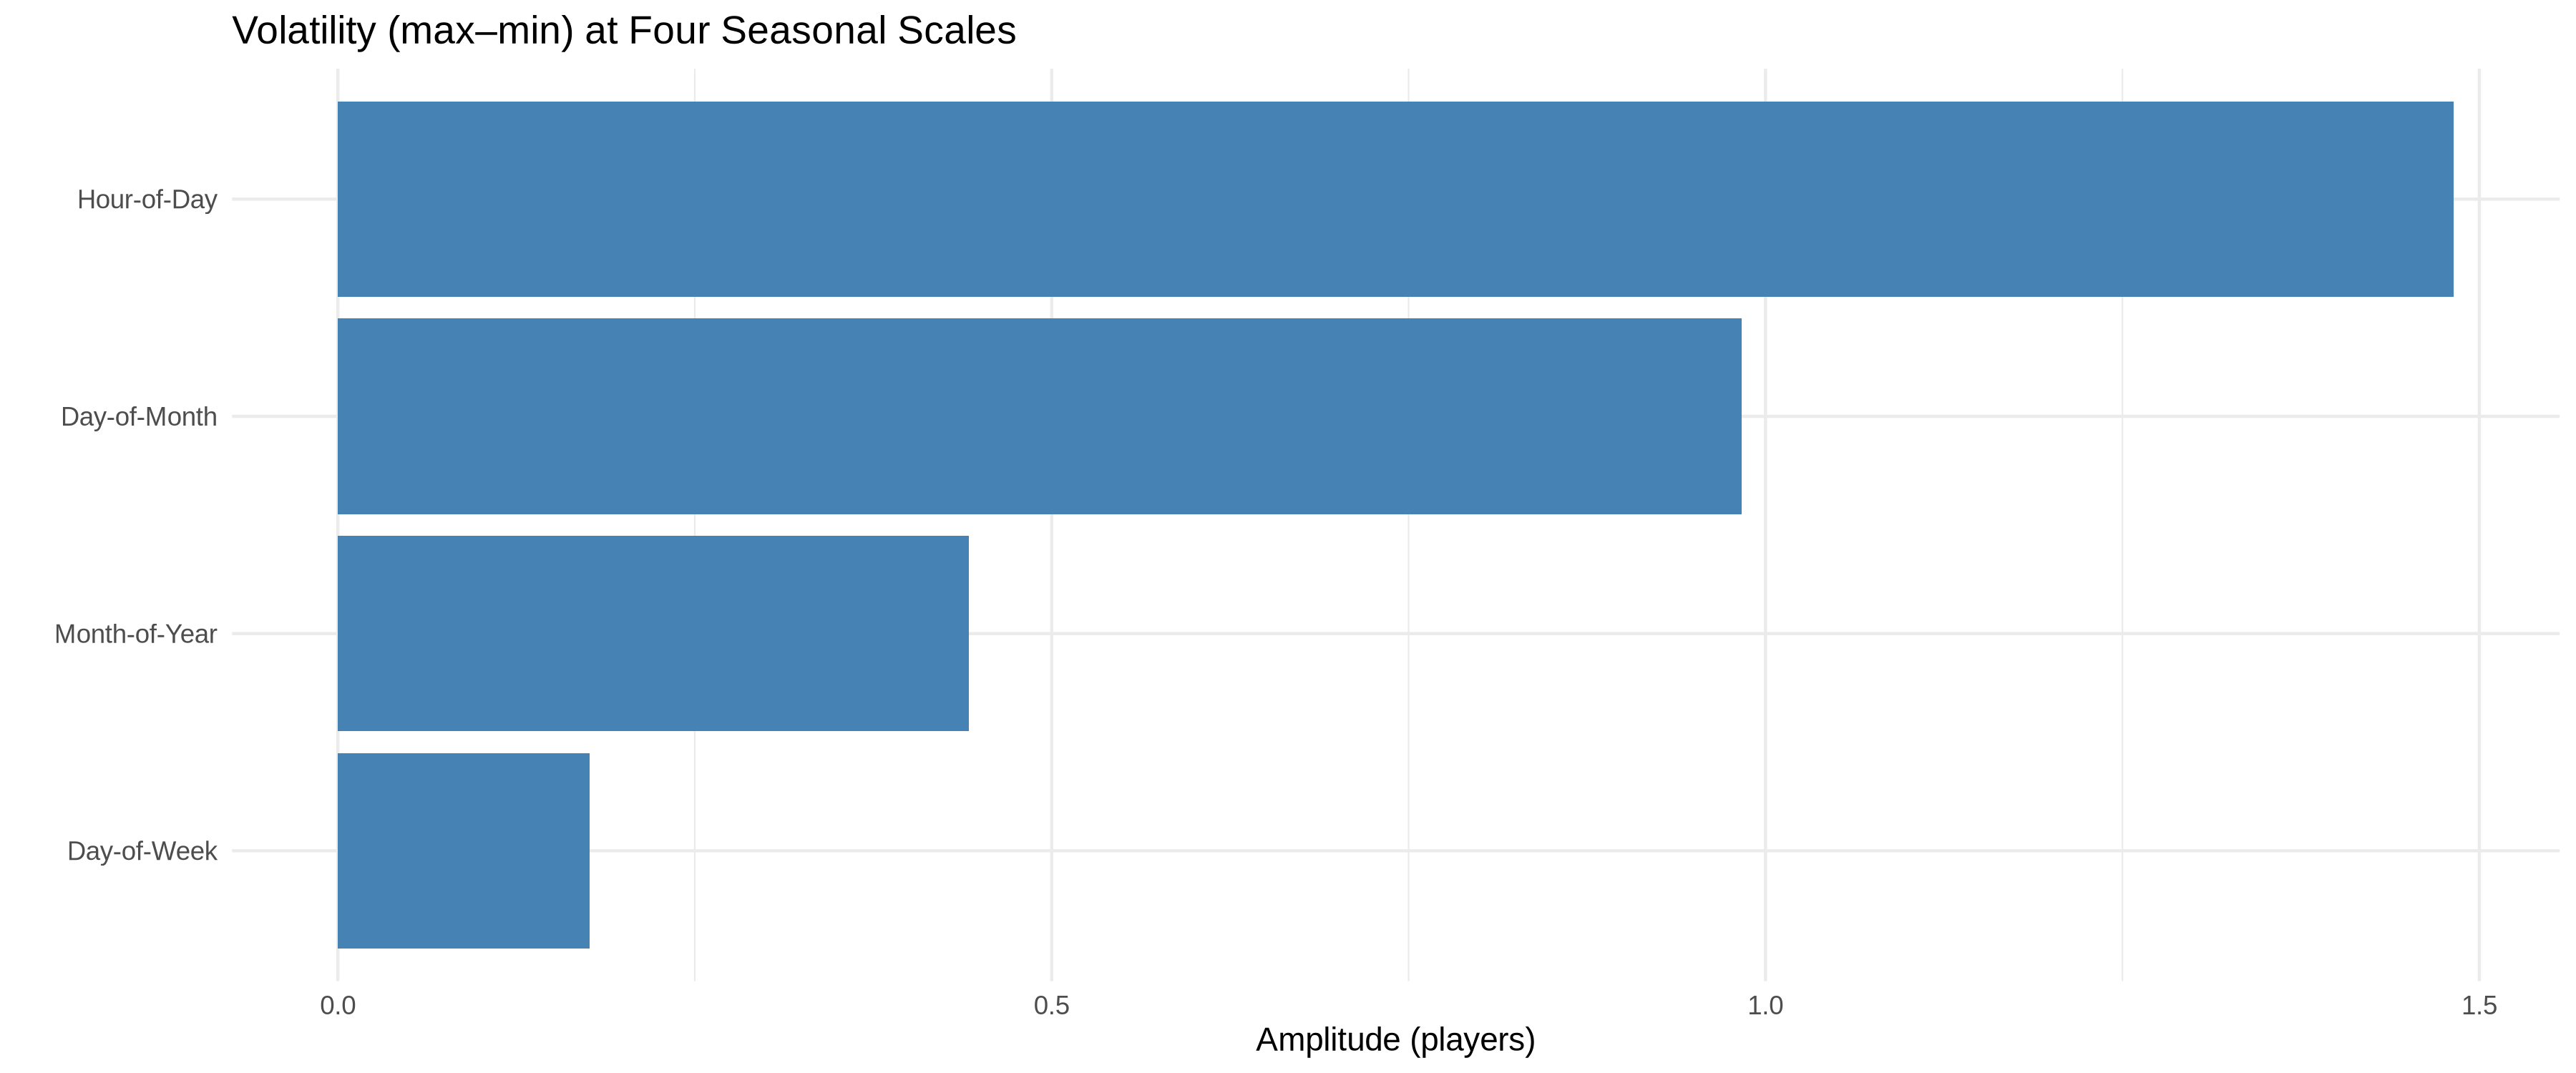

In [74]:
# helper: season name + function to extract its key
seasons <- tibble(
  scale = c("Hour-of-Day", "Day-of-Week", "Day-of-Month", "Month-of-Year"),
  fn    = list(
    \(x) hour(x),
    \(x) wday(x, label = TRUE, abbr = TRUE),
    \(x) day(x),
    \(x) month(x, label = TRUE, abbr = TRUE)
  )
)

# compute amplitude (max – min of the hourly means) for each season
vol_df <- seasons |>
  mutate(amp = map_dbl(fn, \(f)
    hourly |>
      mutate(key = f(hour_seq)) |>
      group_by(key) |>
      summarise(avg = mean(concurrent_players), .groups = "drop") |>
      summarise(max(avg) - min(avg)) |>
      pull()
  ))

# bar chart
ggplot(vol_df, aes(reorder(scale, amp), amp)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Volatility (max–min) at Four Seasonal Scales",
       x = "", y = "Amplitude (players)") +
  theme_minimal()

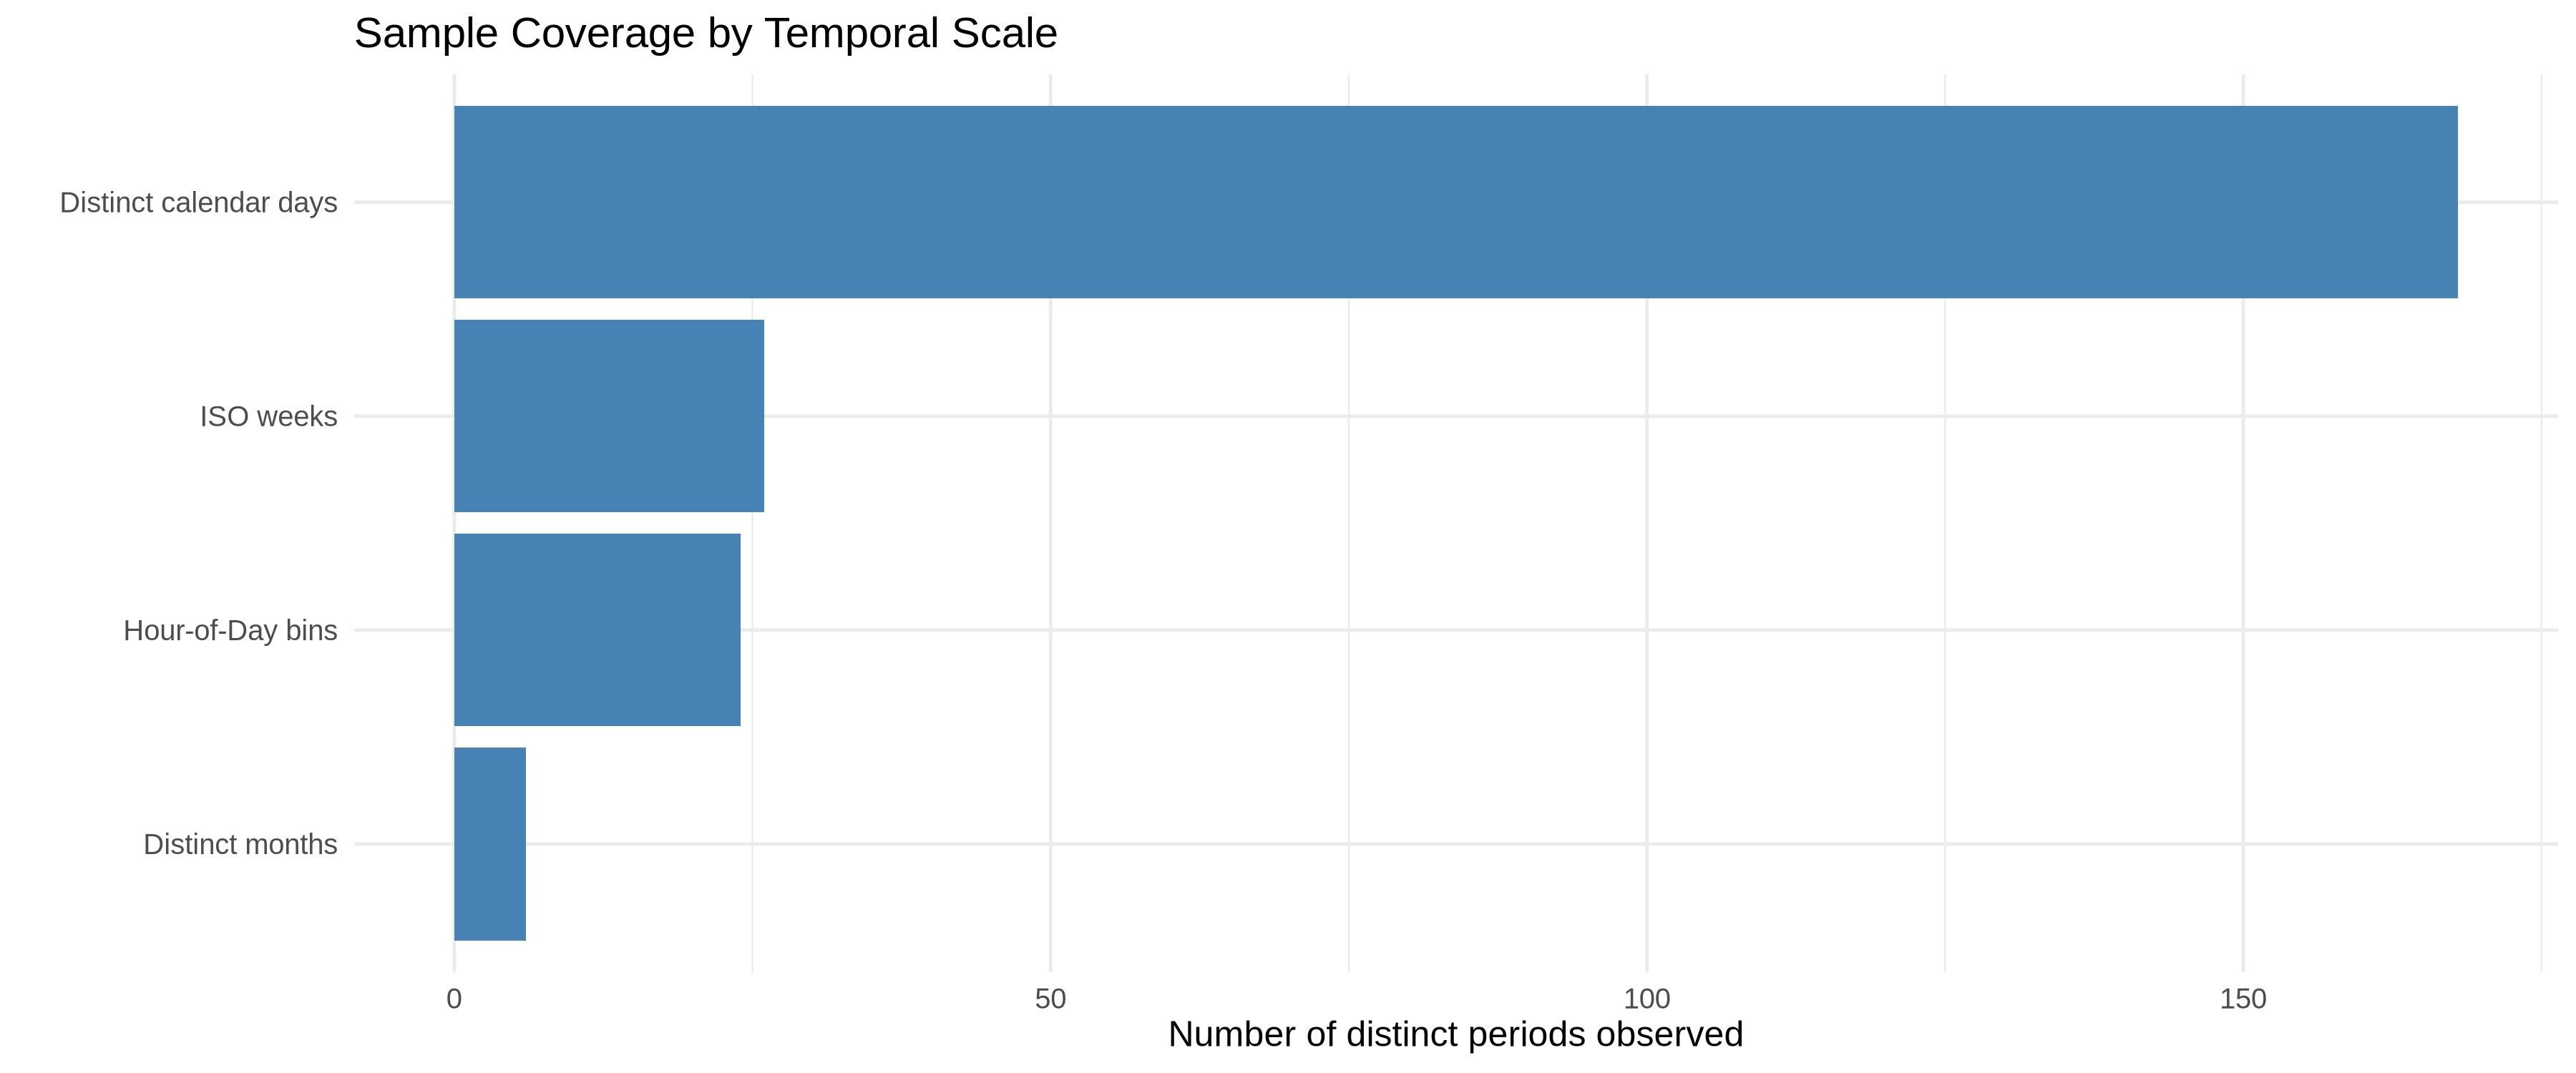

In [75]:
# create four derived keys, then count unique values
coverage_df <- hourly |>
  transmute(
    hour_key  = hour(hour_seq),                       # 0–23  (24 possible)
    day_key   = as_date(hour_seq),                    # calendar date
    week_key  = paste0(year(hour_seq), "-W", isoweek(hour_seq)),
    month_key = floor_date(hour_seq, unit = "month")
  ) |>
  summarise(
    hours  = n_distinct(hour_key),   # will always be 24
    days   = n_distinct(day_key),
    weeks  = n_distinct(week_key),
    months = n_distinct(month_key)
  ) |>
  pivot_longer(everything(),
               names_to  = "scale",
               values_to = "n_periods") |>
  mutate(scale = recode(scale,
                        hours  = "Hour-of-Day bins",
                        days   = "Distinct calendar days",
                        weeks  = "ISO weeks",
                        months = "Distinct months"))
# quick bar plot if you want it visual
ggplot(coverage_df, aes(reorder(scale, n_periods), n_periods)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Sample Coverage by Temporal Scale",
       x = "", y = "Number of distinct periods observed")

## 4 Model
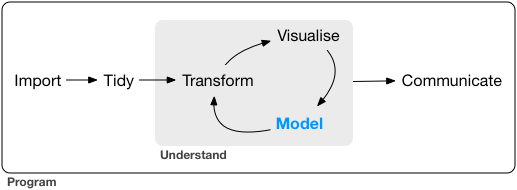

**Now we can proceed with creating a model that can answer our predictive question**

### 4.1 Feature engineering

In [ ]:
lagged_cat <- hourly |>
  arrange(hour_seq) |> # arrgenges
  mutate(
    lag1  = lag(concurrent_players,  1),
    lag24 = lag(concurrent_players, 24),
    hour  = factor(hour(hour_seq), levels = 0:23),   # 24-level factor
    dom   = factor(day(hour_seq))                    # up to 31 levels
  ) |>
  drop_na()                                          # remove first 24 rows

### 4.2 Chronological split (reuse 80/20)
* we can use our ordered data to split

In [85]:
split_cat <- initial_time_split(lagged_cat, prop = 0.80)
train_cat <- training(split_cat)
test_cat  <- testing(split_cat)

# 3. Recipe: one-hot encode hour & dom, standardise numeric lags -------------
rec_cat <- recipe(concurrent_players ~ lag1 + lag24 + hour + dom,
                  data = train_cat) |>
  step_center(all_numeric_predictors()) |>
  step_scale(all_numeric_predictors()) |>
  step_dummy(all_nominal_predictors())

# 4. Model spec & workflow ----------------------------------------------------
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

wf_cat <- workflow() |>
  add_recipe(rec_cat) |>
  add_model(lm_spec)

# 5. 5-fold CV on training set -----------------------------------------------
set.seed(2020)
folds_cat <- vfold_cv(train_cat, v = 5)

cv_cat <- fit_resamples(
  wf_cat,
  resamples = folds_cat,
  metrics   = metric_set(rmse, mae)
)

collect_metrics(cv_cat) |>
  knitr::kable(caption = "Table – CV metrics with hour + dom predictors")

# 6. Final fit and hold-out evaluation ---------------------------------------
fit_cat <- fit(wf_cat, data = train_cat)

pred_cat <- predict(fit_cat, new_data = test_cat) |>
  bind_cols(test_cat)



Table: Table – CV metrics with hour + dom predictors

|.metric |.estimator |      mean|  n|   std_err|.config              |
|:-------|:----------|---------:|--:|---------:|:--------------------|
|mae     |standard   | 0.8651044|  5| 0.0283345|Preprocessor1_Model1 |
|rmse    |standard   | 1.2648495|  5| 0.0893456|Preprocessor1_Model1 |

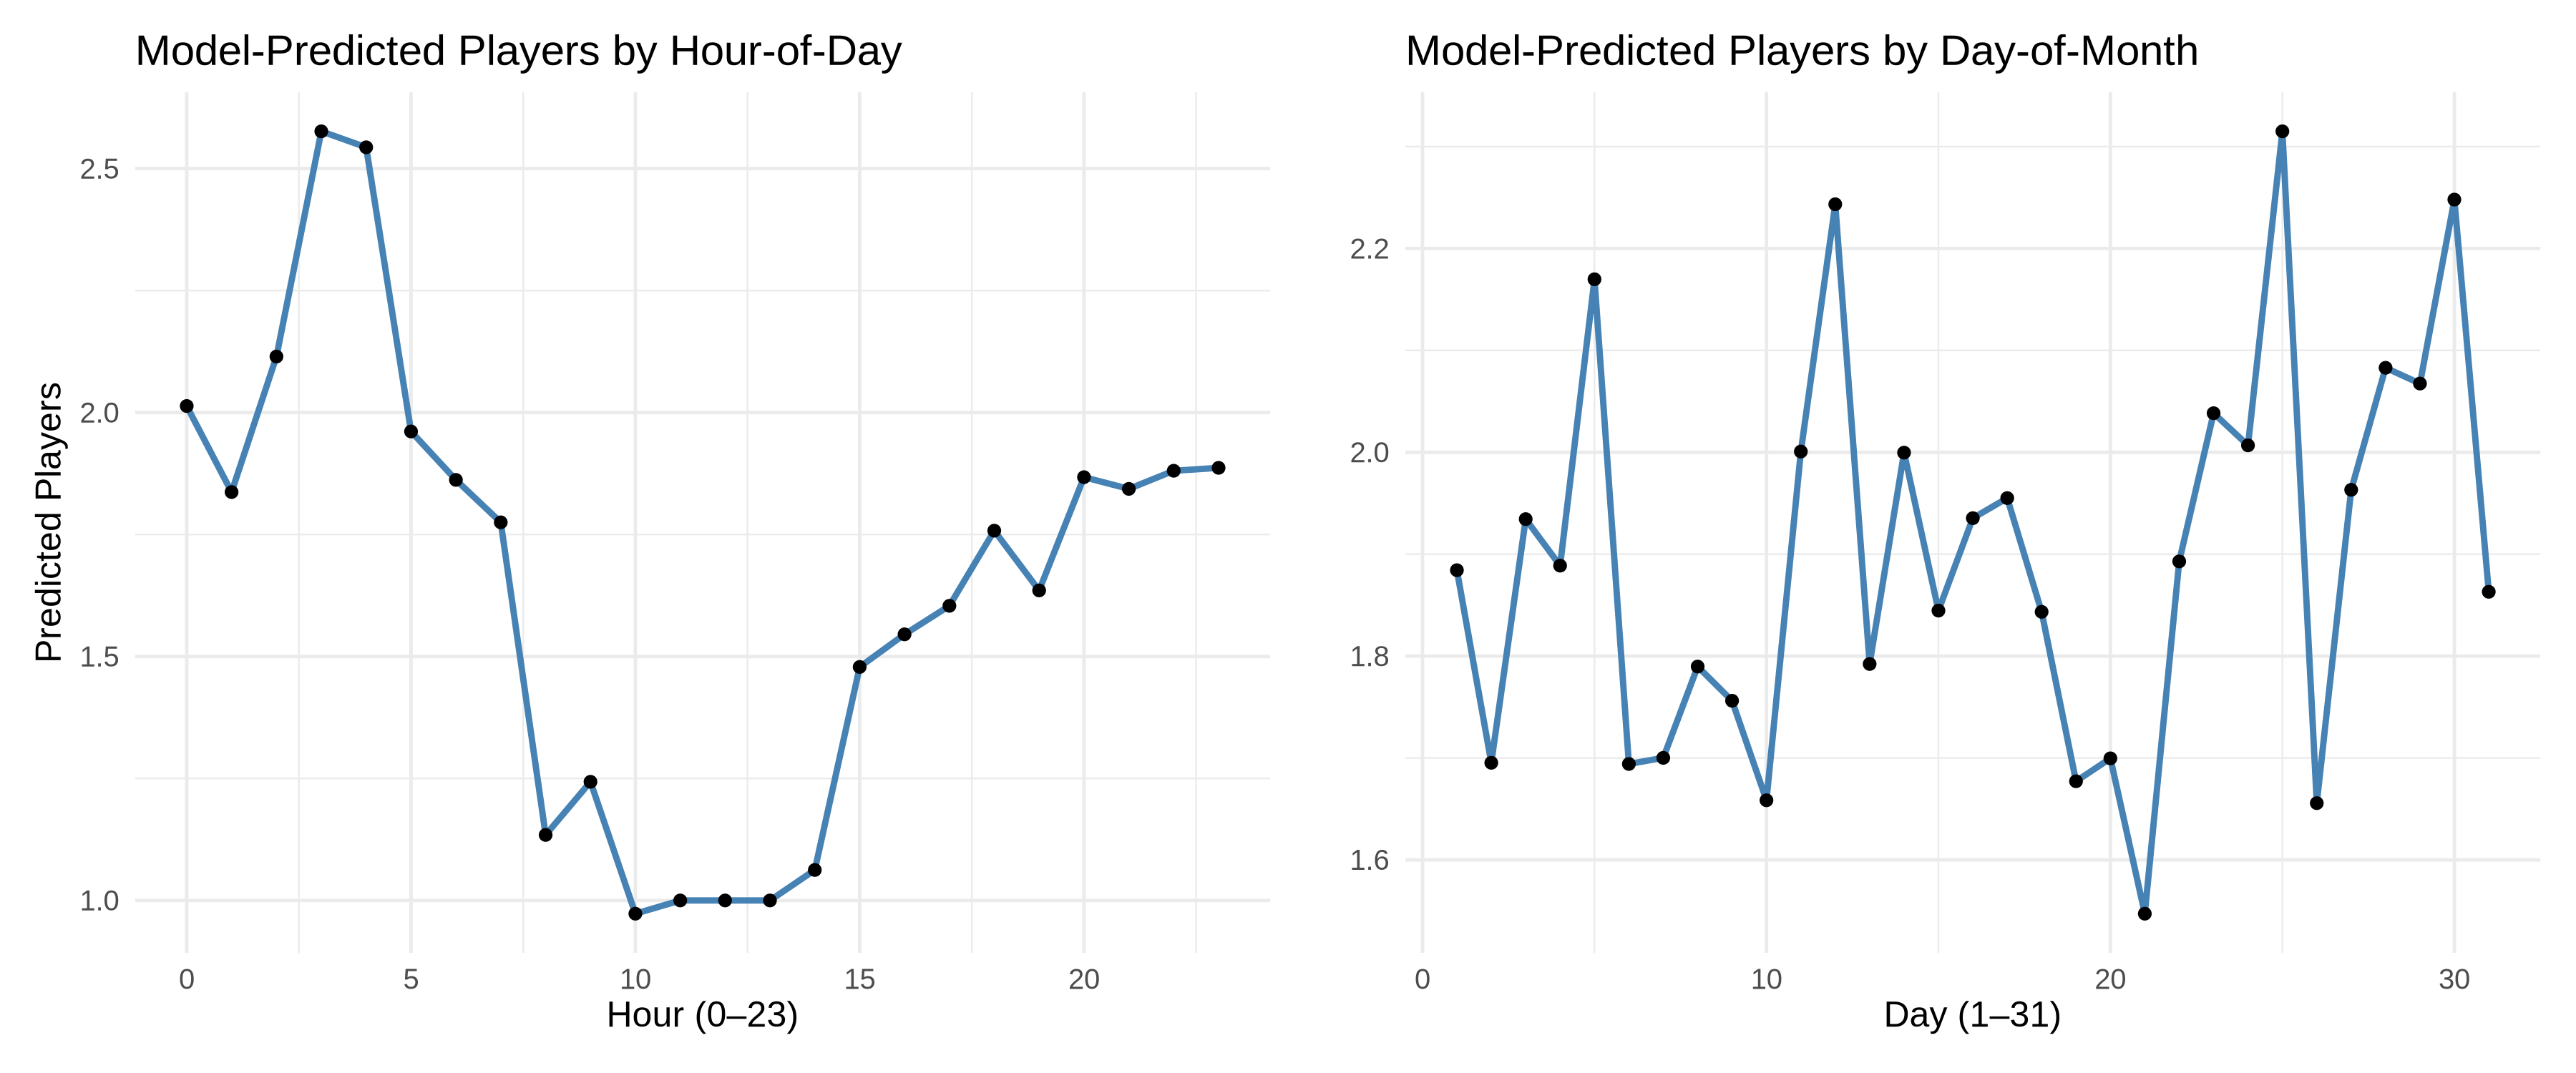

In [77]:
library(tidyverse)
library(patchwork)

# 1 · Add model predictions back to data --------------------------------------
pred_df <- predict(fit_cat, new_data = lagged_cat) |>
  bind_cols(lagged_cat)            # keep hour & dom factors

# 2 · Hour-of-day effect ------------------------------------------------------
p_hour <- pred_df |>
  group_by(hour) |>
  summarise(pred_mean = mean(.pred), .groups = "drop") |>
  ggplot(aes(as.integer(as.character(hour)), pred_mean)) +
  geom_line(colour = "steelblue", linewidth = 1) +
  geom_point() +
  labs(title = "Model-Predicted Players by Hour-of-Day",
       x = "Hour (0–23)", y = "Predicted Players")

# 3 · Day-of-month effect -----------------------------------------------------
p_dom <- pred_df |>
  group_by(dom) |>
  summarise(pred_mean = mean(.pred), .groups = "drop") |>
  ggplot(aes(as.integer(as.character(dom)), pred_mean)) +
  geom_line(colour = "steelblue", linewidth = 1) +
  geom_point() +
  labs(title = "Model-Predicted Players by Day-of-Month",
       x = "Day (1–31)", y = "")

# 4 · Display side-by-side ----------------------------------------------------
p_hour | p_dom

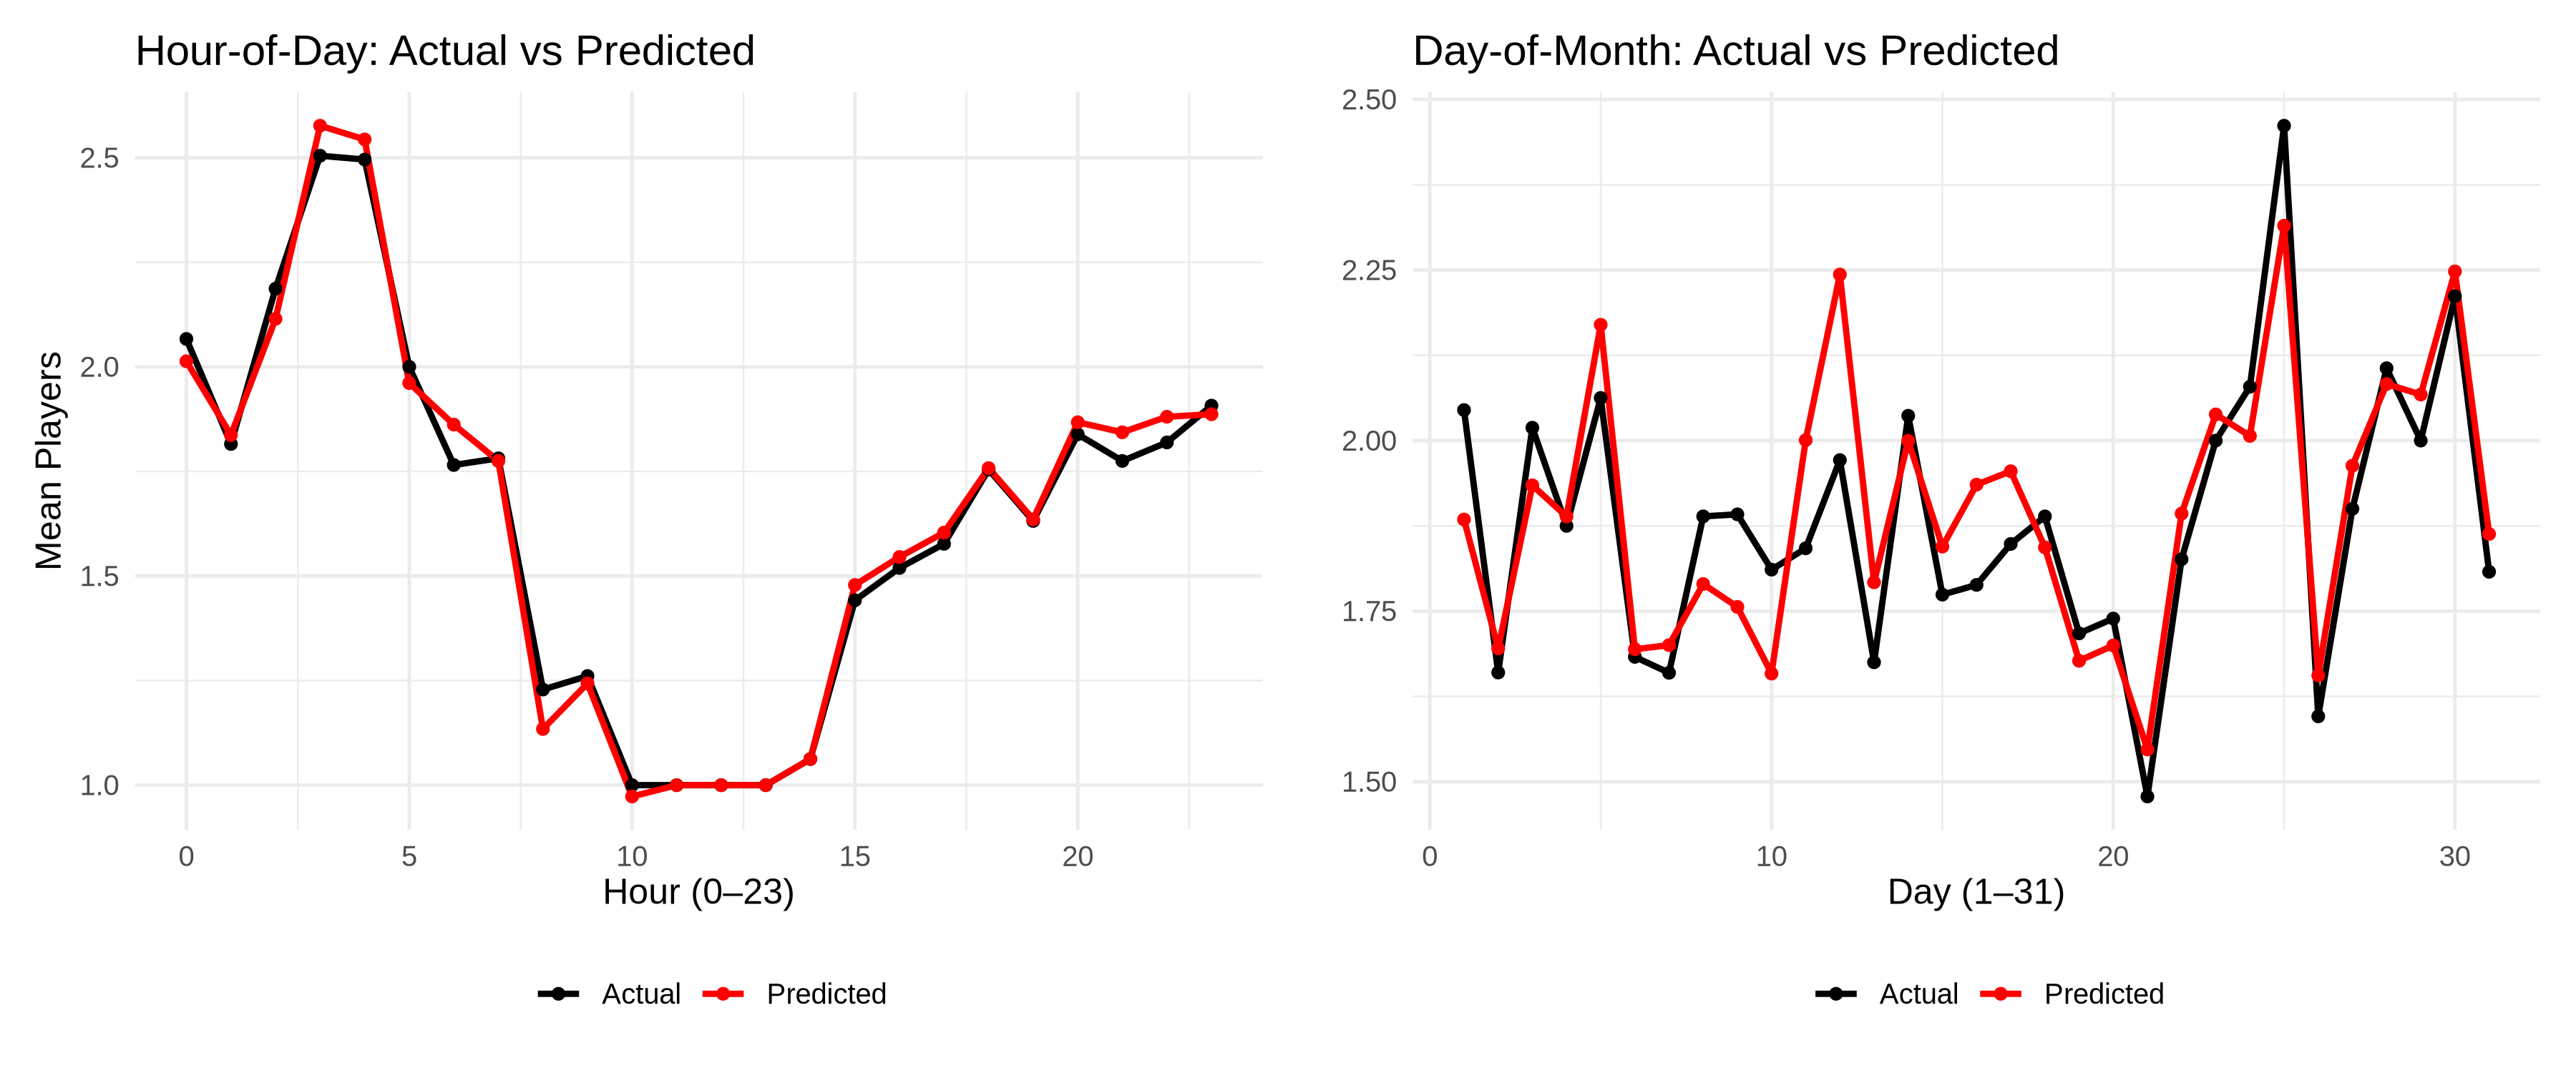

In [78]:
library(tidyverse)
library(patchwork)
theme_set(theme_minimal(base_size = 12))

# Make sure `pred_df` exists (see previous chunk):
# pred_df <- predict(fit_cat, new_data = lagged_cat) |>
#            bind_cols(lagged_cat)

## 1 · Hour-of-day overlay -----------------------------------------------------
hour_comp <- pred_df |>
  group_by(hour) |>
  summarise(
    actual    = mean(concurrent_players),
    predicted = mean(.pred),
    .groups   = "drop"
  ) |>
  pivot_longer(c(actual, predicted),
               names_to  = "series",
               values_to = "mean_players")

p_hour_overlay <- ggplot(hour_comp,
                         aes(as.integer(as.character(hour)),
                             mean_players,
                             colour = series,
                             group  = series)) +
  geom_line(linewidth = 1) +
  geom_point() +
  scale_colour_manual(values = c(actual = "black", predicted = "red"),
                      labels = c("Actual", "Predicted")) +
  labs(title  = "Hour-of-Day: Actual vs Predicted",
       x      = "Hour (0–23)",
       y      = "Mean Players",
       colour = "") +
  theme(legend.position = "bottom")

## 2 · Day-of-month overlay ----------------------------------------------------
dom_comp <- pred_df |>
  group_by(dom) |>
  summarise(
    actual    = mean(concurrent_players),
    predicted = mean(.pred),
    .groups   = "drop"
  ) |>
  pivot_longer(c(actual, predicted),
               names_to  = "series",
               values_to = "mean_players")

p_dom_overlay <- ggplot(dom_comp,
                        aes(as.integer(as.character(dom)),
                            mean_players,
                            colour = series,
                            group  = series)) +
  geom_line(linewidth = 1) +
  geom_point() +
  scale_colour_manual(values = c(actual = "black", predicted = "red"),
                      labels = c("Actual", "Predicted")) +
  labs(title  = "Day-of-Month: Actual vs Predicted",
       x      = "Day (1–31)",
       y      = "",
       colour = "") +
  theme(legend.position = "bottom")

## 3 · Display side-by-side ----------------------------------------------------
p_hour_overlay | p_dom_overlay

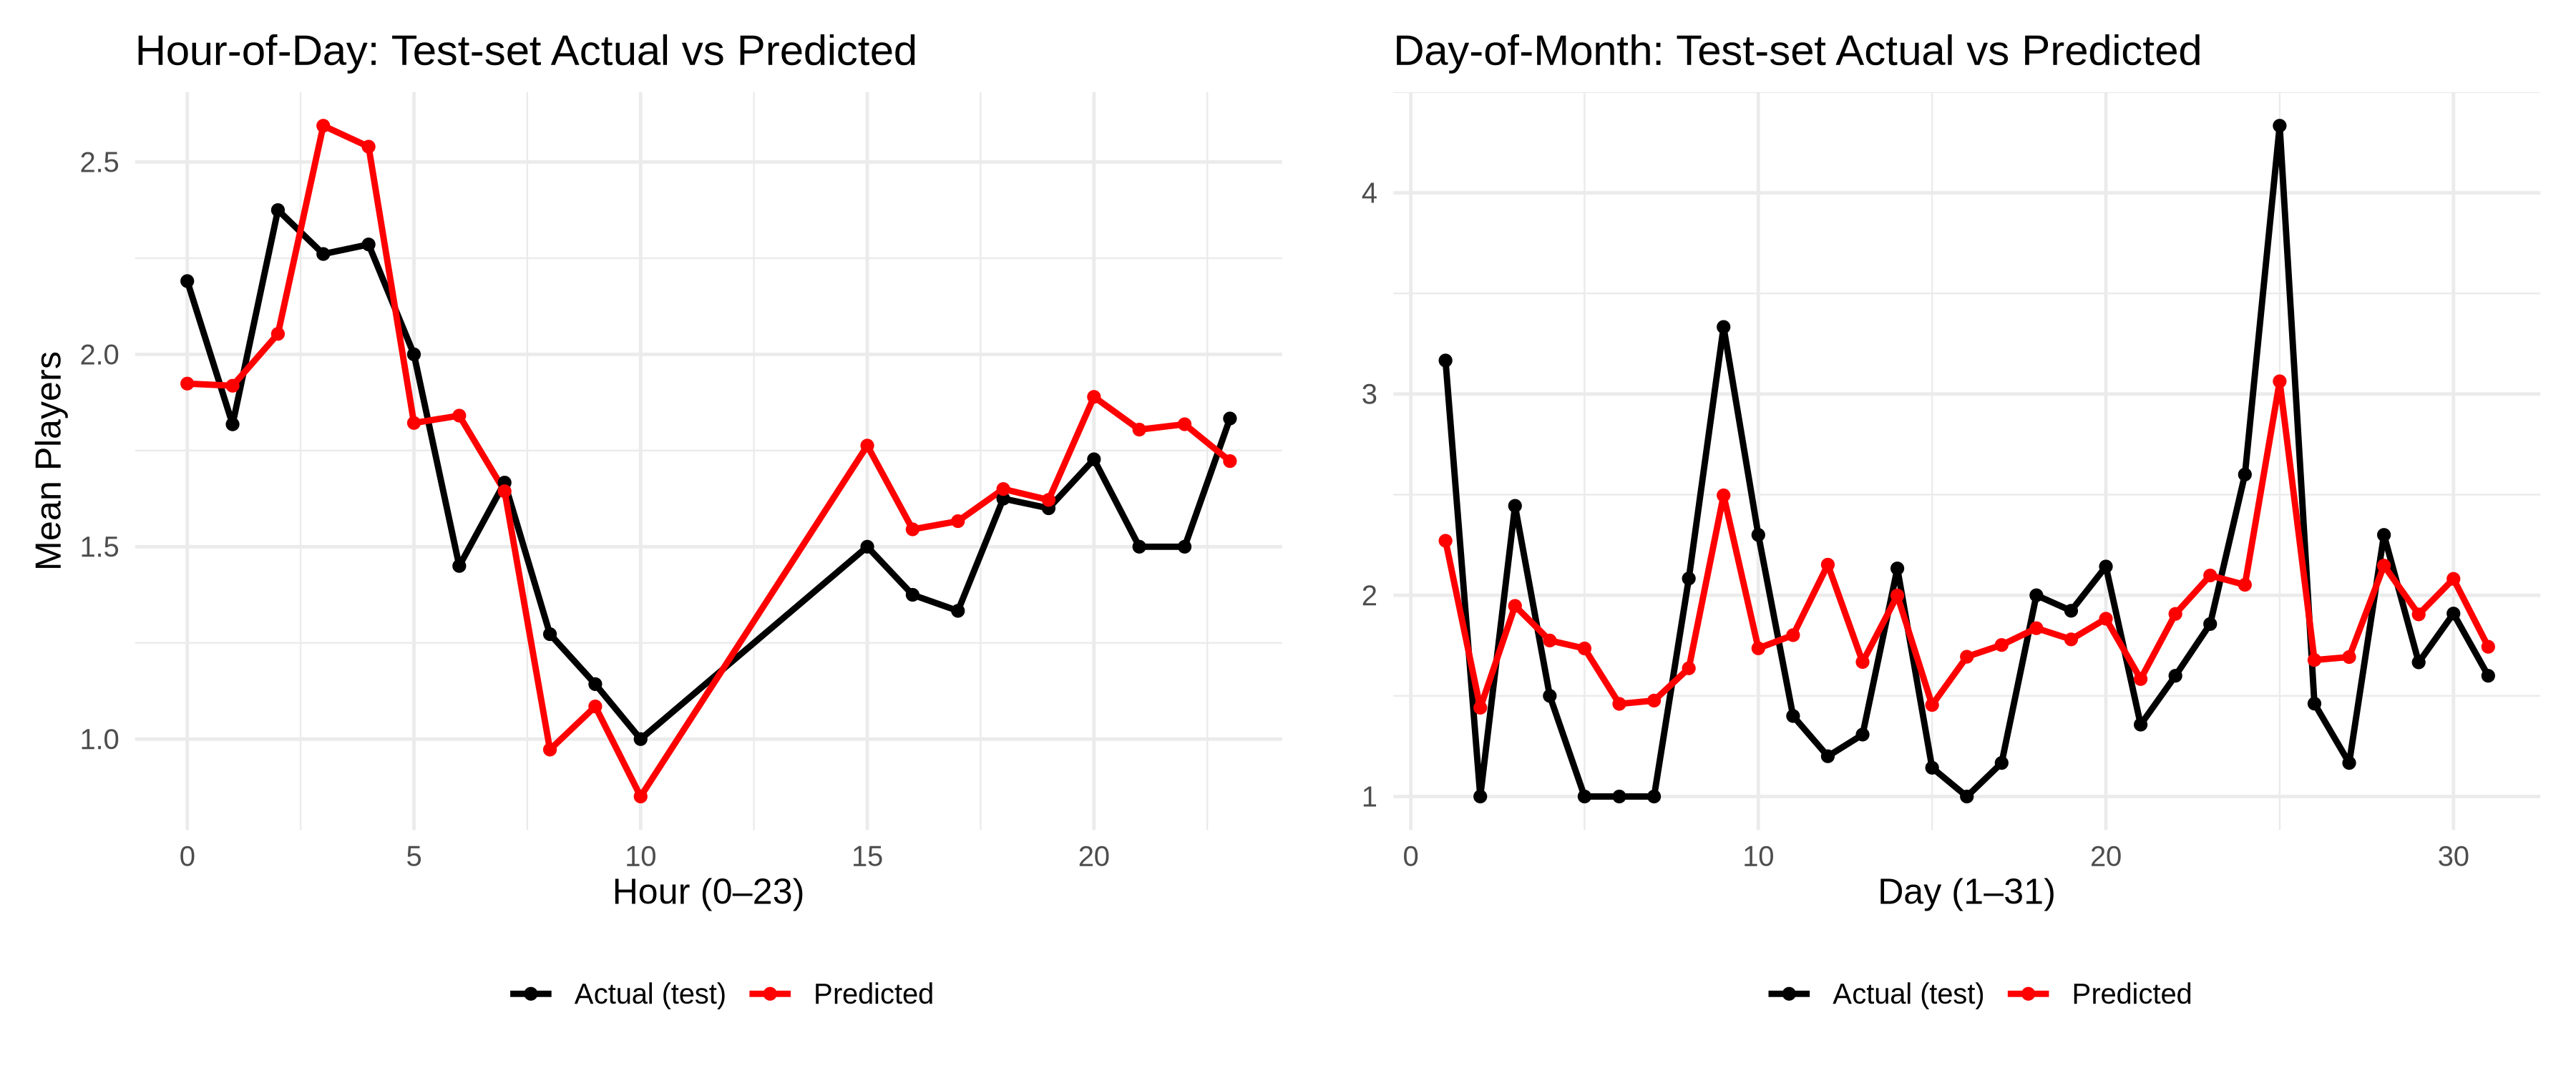

In [79]:
# … code above unchanged …

p_hour <- ggplot(hour_hold,
                 aes(as.integer(as.character(hour)),
                     mean_players,
                     colour = series,
                     group  = series)) +
  geom_line(linewidth = 1) +
  geom_point() +
  scale_colour_manual(values = c(actual = "black", predicted = "red"),
                      labels  = c("Actual (test)", "Predicted")) +   # <— relabelled
  labs(title  = "Hour-of-Day: Test-set Actual vs Predicted",
       x      = "Hour (0–23)", y = "Mean Players", colour = "") +
  theme(legend.position = "bottom")

# …

p_dom <- ggplot(dom_hold,
                aes(as.integer(as.character(dom)),
                    mean_players,
                    colour = series,
                    group  = series)) +
  geom_line(linewidth = 1) +
  geom_point() +
  scale_colour_manual(values = c(actual = "black", predicted = "red"),
                      labels  = c("Actual (test)", "Predicted")) +   # <— relabelled
  labs(title  = "Day-of-Month: Test-set Actual vs Predicted",
       x      = "Day (1–31)", y = "", colour = "") +
  theme(legend.position = "bottom")

# combine plots
p_hour | p_dom

In [82]:
lag_summary <- lagged_cat |>            # or lagged_data if you prefer
  summarise(across(
    .cols  = c(lag1, lag24),
    .fns   = list(mean = mean, sd = sd, min = min, max = max),
    .names = "{.col}_{.fn}"
  )) |>
  pivot_longer(everything(),
               names_to  =a c("Lag", ".value"),
               names_sep = "_")

lag_summary

Lag   mean     sd       min max
1 lag1  1.894303 1.351058 1   16 
2 lag24 1.901167 1.359684 1   16

## 5 Discussion

summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

## 6 References